In [16]:
import cv2
import csv

def compare_frames(frame1, frame2, writer):
    # Convert frames to grayscale
    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors
    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    # Initialize Brute-Force Matcher
    bf = cv2.BFMatcher()

    # Match descriptors
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    # Apply ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append([m])

    # Write the ratio of good matches to matches to CSV file
    match_ratio = len(good_matches) / len(matches)
    writer.writerow([match_ratio])

# Paths to the videos
video1_path = "/Users/parkermei/miniconda3/easy_ViTPose/7Short1.mp4"
video2_path = "/Users/parkermei/miniconda3/easy_ViTPose/7Short3.mp4"
csv_file_path = "match_ratios.csv"

# Open video capture objects
cap1 = cv2.VideoCapture(video1_path)
cap2 = cv2.VideoCapture(video2_path)

# Create CSV file and writer
csv_file = open(csv_file_path, 'w', newline='')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Match Ratio'])  # Write header

# Read the first frames
ret1, prev_frame1 = cap1.read()
ret2, prev_frame2 = cap2.read()
frame_count = 0

# Loop through the frames
while True:
    # Read the next frames
    ret1, frame1 = cap1.read()
    ret2, frame2 = cap2.read()

    # Check if the frames are read correctly
    if not (ret1 and ret2):
        break

    # Compare frames and write match ratio to CSV file
    compare_frames(prev_frame1, prev_frame2, csv_writer)
    frame_count += 1

    # Update the previous frames
    prev_frame1 = frame1
    prev_frame2 = frame2

# Release the video capture objects
cap1.release()
cap2.release()

# Close CSV file
csv_file.close()

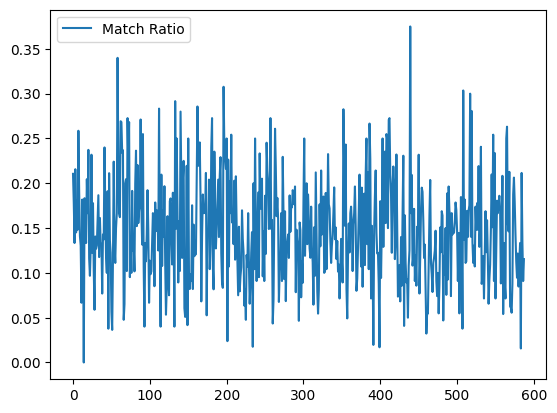

Match Ratio    0.0
dtype: float64
Match Ratio    0.375
dtype: float64


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('match_ratios.csv')

#FINDING MAX AND MIN
#p=df['Match Ratio'].max()
#q=df['Match Ratio'].min()

df.plot()
plt.show()
print(df.min())
print(df.max())

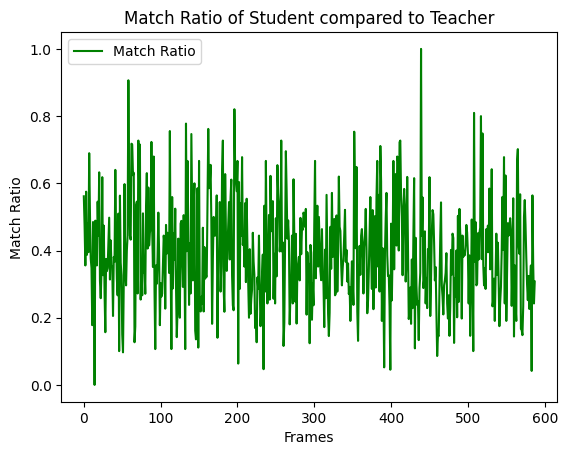

In [29]:
df_max_scaled = df.copy() 
  
# apply normalization techniques 
for column in df_max_scaled.columns: 
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max() 
df_max_scaled.plot(color = 'green')
plt.xlabel("Frames")
plt.ylabel("Match Ratio")
plt.title("Match Ratio of Student compared to Teacher")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

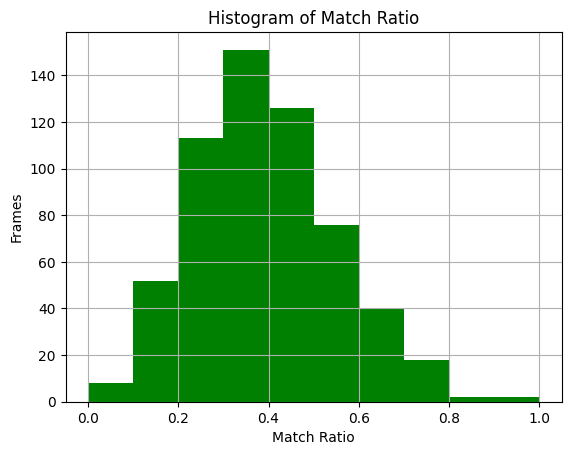

In [30]:
#df.hist()
df_max_scaled.hist(color = 'green')
plt.ylabel("Frames")
plt.xlabel("Match Ratio")
plt.title("Histogram of Match Ratio")
plt.show